In [126]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,classification_report
import seaborn as sns

In [127]:
# Function to load images using PIL
def load_images_from_folder(folder_path, target_size=(224, 224)):
    images = []
    labels = []
    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                if os.path.isfile(img_path):
                    img = Image.open(img_path).convert('RGB')  # Convert to RGB if the image is in grayscale
                    #img = img.resize(target_size)  # Resize the image to the specified target size
                    img_array = np.array(img) / 255.0  # Normalize pixel values to be between 0 and 1
                    images.append(img_array)
                    labels.append(class_label)
    return np.array(images), np.array(labels)

# Now you have the images and labels, and you can use them as needed for your model

In [128]:
# Load images using the function
dataset_path = 'Monkeys'
x, y = load_images_from_folder(dataset_path)

In [129]:
print(set(y))

{0, 1, 2, 3, 4}


In [130]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100,shuffle=True)

In [131]:
from sklearn.preprocessing import OneHotEncoder
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)

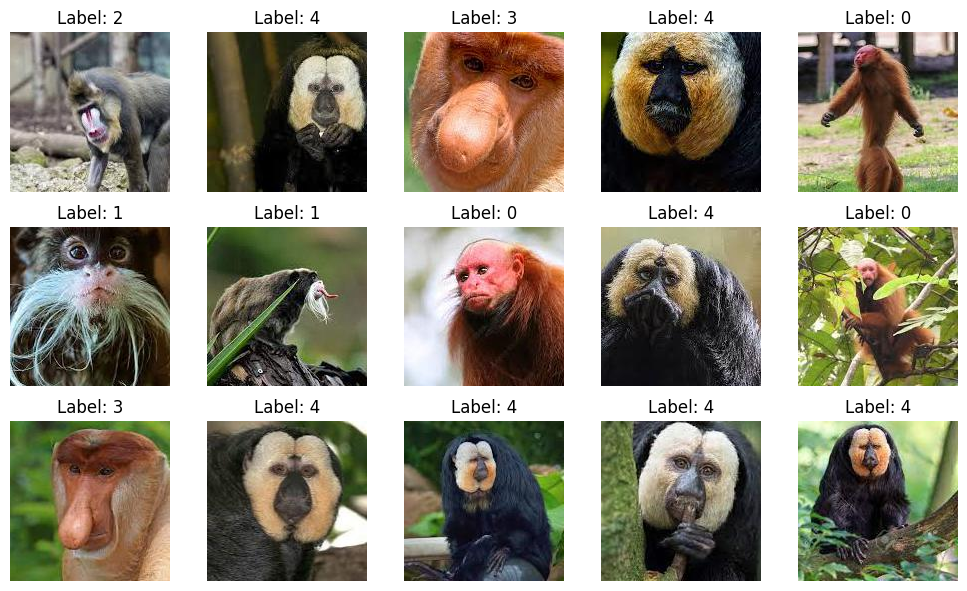

In [132]:
# Visualize sample images from the dataset
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.ravel()
for i in range(15):
    axes[i].imshow(x_train[i].reshape(160, 160,3), cmap='gray')
    axes[i].set_title(f"Label: {np.argmax(y_train_encoded[i])}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [133]:
# Build the CNN model
model = Sequential()

model.add(Conv2D(80, (3, 3), activation='relu', input_shape=(160, 160, 3)))  # 8 filters of size 3x3, ReLU activation function
model.add(MaxPooling2D((2, 2)))  # Max pooling with pool size 2x2

model.add(Conv2D(60, (3, 3), activation='relu'))  # 16 filters of size 3x3, ReLU activation
model.add(MaxPooling2D((2, 2)))  # Max pooling

model.add(Flatten())  # Flatten the output from 2D to 1D

model.add(Dense(30, activation='relu'))  # Fully connected layer with 30 units, ReLU activation
model.add(Dense(20, activation='relu'))  # Fully connected layer with 30 units, ReLU activation
model.add(Dense(5, activation='softmax'))  # Output layer with 1 units (classes), softmax activation

In [134]:
model.summary() # print the archticture of model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 158, 158, 80)      2240      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 79, 79, 80)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 77, 77, 60)        43260     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 38, 38, 60)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 86640)             0         
                                                                 
 dense_12 (Dense)            (None, 30)               

In [135]:
# print trainable parameters of model
for i in model.layers:
    print(f"Layer {i.name} : {i.count_params()} trainable parameters")
    print('----------------------------------------------')

Layer conv2d_8 : 2240 trainable parameters
----------------------------------------------
Layer max_pooling2d_8 : 0 trainable parameters
----------------------------------------------
Layer conv2d_9 : 43260 trainable parameters
----------------------------------------------
Layer max_pooling2d_9 : 0 trainable parameters
----------------------------------------------
Layer flatten_4 : 0 trainable parameters
----------------------------------------------
Layer dense_12 : 2599230 trainable parameters
----------------------------------------------
Layer dense_13 : 620 trainable parameters
----------------------------------------------
Layer dense_14 : 105 trainable parameters
----------------------------------------------


In [136]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [137]:
# Train the model
model.fit(x_train, y_train_encoded, batch_size=32, epochs=12)

Epoch 1/12


13/13 [==============================] - 14s 1s/step - loss: 1.7897 - accuracy: 0.2700
Epoch 2/12
13/13 [==============================] - 13s 981ms/step - loss: 1.4230 - accuracy: 0.4625
Epoch 3/12
13/13 [==============================] - 13s 1s/step - loss: 1.0766 - accuracy: 0.5975
Epoch 4/12
13/13 [==============================] - 13s 989ms/step - loss: 0.7255 - accuracy: 0.7425
Epoch 5/12
13/13 [==============================] - 15s 1s/step - loss: 0.5537 - accuracy: 0.8050
Epoch 6/12
13/13 [==============================] - 15s 1s/step - loss: 0.4230 - accuracy: 0.8275
Epoch 7/12
13/13 [==============================] - 14s 1s/step - loss: 0.4123 - accuracy: 0.8350
Epoch 8/12
13/13 [==============================] - 14s 1s/step - loss: 0.2835 - accuracy: 0.9100
Epoch 9/12
13/13 [==============================] - 13s 1s/step - loss: 0.2062 - accuracy: 0.9300
Epoch 10/12
13/13 [==============================] - 14s 1s/step - loss: 0.1020 - accuracy: 0.9775
Epoch 11/12
13/13 [=====

In [138]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test_encoded)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

4/4 [==============================] - 1s 170ms/step - loss: 0.3551 - accuracy: 0.8900
Test Loss: 0.3551
Test Accuracy: 0.8900


In [139]:
y_pred = model.predict(x_test)

4/4 [==============================] - 1s 172ms/step


In [140]:
print(y_pred.shape,y_test.shape)

(100, 5) (100, 1)


In [141]:
# convert from One Hot Encoding to int values that represent int labels
num_of_classes = y_test_encoded.shape[1]
print('Number of classes : ' , num_of_classes)
true_labels = []
for label in y_test_encoded:
    true_label = np.argmax(label)
    true_labels.append(true_label)
print(true_labels[:30])

pred_labels = []
for label in y_pred:
    true_label = np.argmax(label)
    pred_labels.append(true_label)
#print(set(true_labels))
print(pred_labels[:30])

Number of classes :  5
[0, 0, 4, 3, 0, 1, 4, 1, 1, 1, 1, 0, 1, 4, 1, 4, 3, 2, 1, 4, 1, 4, 0, 2, 2, 2, 1, 3, 2, 0]
[0, 0, 4, 3, 0, 1, 4, 1, 3, 1, 1, 0, 1, 4, 1, 4, 3, 2, 1, 4, 2, 4, 0, 2, 2, 1, 1, 3, 2, 0]


In [142]:
set(pred_labels)

{0, 1, 2, 3, 4}

In [143]:
precision = precision_score (true_labels,pred_labels , average='macro')
recall = recall_score(true_labels,pred_labels , average='macro')
f1 = f1_score(true_labels,pred_labels,average='macro')

print('precision_score : ' , precision )
print('recall_score : ' , recall )
print('f1_score : ' , f1 )

precision_score :  0.8897619047619048
recall_score :  0.882961038961039
f1_score :  0.8828885029188982


[[16  0  0  1  3]
 [ 0 23  1  1  0]
 [ 0  1 11  0  2]
 [ 0  0  0 19  0]
 [ 0  0  2  0 20]]


<AxesSubplot: >

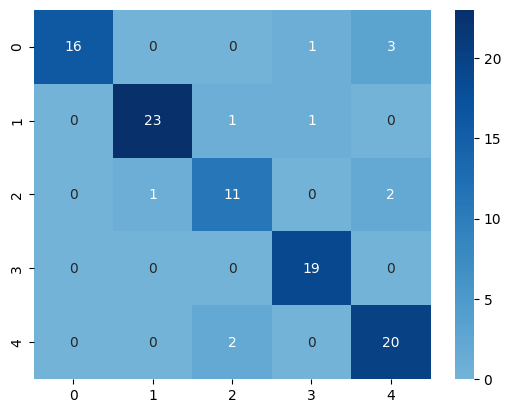

In [144]:
cm = confusion_matrix(true_labels,pred_labels)
print(cm)

sns.heatmap(cm,center=True,cmap='Blues' ,annot = True)

In [145]:
repo = classification_report(true_labels,pred_labels)
print(repo)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.96      0.92      0.94        25
           2       0.79      0.79      0.79        14
           3       0.90      1.00      0.95        19
           4       0.80      0.91      0.85        22

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.90      0.89      0.89       100

